In [35]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
bitcoin = yf.Ticker("BTC-USD")
ethereum = yf.Ticker("ETH-USD")
sp_500 = yf.Ticker("^GSPC")
nasdaq = yf.Ticker("^IXIC")
oro = yf.Ticker("GC=F")
euro_dollar = yf.Ticker("EURUSD=X")

In [13]:
# get all stock info
bitcoin.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,783,412. The last known price of Bitcoin is 91,173.93217394 USD and is down -0.22 over the last 24 hours. It is currently trading on 11800 active market(s) with $45,939,038,382.09 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 89849.766,
 'open': 89849.766,
 'dayLow': 89752.586,
 'dayHigh': 90762.53,
 'regularMarketPreviousClose': 89849.766,
 'regularMarketOpen': 89849.766,
 'regularMarketDayLow': 89752.586,
 'regularMarketDayHigh': 90762.53,
 'volume': 46346850304,
 'regularMarketVolume': 46346850304,
 'averageVolume': 37577790484,
 'averageVolume10days': 81561675370,
 'averageDailyVolume10Day': 81561675370,
 'marketCap': 1793473380352,
 'fiftyTwoWeekLow': 35670.973,
 'fiftyTwoWeekHig

In [14]:
# Definir los símbolos de los activos
symbols = ["BTC-USD", "ETH-USD", "MSFT",  "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Crear la lista de objetos Ticker
tickers = [yf.Ticker(symbol) for symbol in symbols]

# Diccionario para almacenar el historial de cada ticker
hist_data = []

# Extraer el historial de cada ticker y agregar una columna que indique el activo
for symbol, ticker in zip(symbols, tickers):
    hist = ticker.history(period="max")
    hist['Symbol'] = symbol  # Añadir columna del símbolo
    hist_data.append(hist[['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']])

# Combinar los datos en un único DataFrame
df_hist = pd.concat(hist_data).reset_index()

# Mostrar las primeras filas del DataFrame combinado
df_hist.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17 00:00:00+00:00,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18 00:00:00+00:00,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19 00:00:00+00:00,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20 00:00:00+00:00,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21 00:00:00+00:00,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


In [16]:
# Asegúrate de tener el DataFrame df_hist con las columnas necesarias
df_hist['Date'] = df_hist['Date'].astype(str).str[:10]

dfs = []

# Iterar por cada símbolo y calcular el rendimiento logarítmico y el retorno porcentual
for symbol, group in df_hist.groupby('Symbol'):
    group = group.copy()  # Evitar modificar la referencia original
    group['Rendimiento_Log'] = np.log(group['Close'] / group['Close'].shift(1))
    group['Retorno_Porcentual'] = group['Close'].pct_change() * 100
    dfs.append(group)

# Concatenar todos los DataFrames de nuevo
df_resultado = pd.concat(dfs, ignore_index=True)

# Convertir la columna 'Date' a tipo datetime
df_resultado['Date'] = pd.to_datetime(df_resultado['Date'])

# Añadir una columna de año al DataFrame
df_resultado['Year'] = df_resultado['Date'].dt.year

# Agregar columnas de año y mes
df_resultado['YearMonth'] = df_resultado['Date'].dt.to_period('M')

# Establecer 'Date' como índice
df_resultado.set_index('Date', inplace=True)


In [17]:
df_resultado

,Symbol,Open,High,Low,Close,Volume,Retorno_Porcentual,Rendimiento_Log,Year,YearMonth
Date,,,,,,,,,,
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,2014,2014-09
2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200,-7.192558,-0.074643,2014,2014-09
2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700,-6.984265,-0.072402,2014,2014-09
2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600,3.573492,0.035111,2014,2014-09
2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100,-2.465854,-0.024968,2014,2014-09
...,...,...,...,...,...,...,...,...,...,...
2024-11-11,^IXIC,19355.339844,19366.070312,19193.289062,19298.759766,8087930000,0.062118,0.000621,2024,2024-11
2024-11-12,^IXIC,19289.810547,19343.050781,19168.519531,19281.400391,7816410000,-0.089951,-0.000900,2024,2024-11
2024-11-13,^IXIC,19286.460938,19358.480469,19191.130859,19230.720703,9623670000,-0.262842,-0.002632,2024,2024-11


In [ ]:
# Agrupar por el símbolo del activo y calcular estadísticas descriptivas
stats_by_symbol = df_resultado.groupby("Symbol").describe()

# Mostrar las estadísticas descriptivas por símbolo
stats_by_symbol[["Retorno_Porcentual"]]

Retorno_Porcentual                                           \
                      count      mean       std        min       25%   
Symbol                                                                 
BTC-USD              3714.0  0.209019  3.632811 -37.169539 -1.258948   
ETH-USD              2565.0  0.195394  4.587868 -42.347221 -1.859076   
EURUSD=X             5441.0  0.000173  0.707957 -13.352640 -0.319410   
GC=F                 6076.0  0.042920  1.086216  -9.353766 -0.474032   
MSFT                 9748.0  0.112990  2.105247 -30.115894 -0.911529   
^GSPC               24336.0  0.031001  1.193652 -20.466931 -0.454696   
^IXIC               13562.0  0.046572  1.263909 -12.321331 -0.457152   

                                         
               50%       75%        max  
Symbol                                   
BTC-USD   0.133449  1.700184  25.247169  
ETH-USD   0.080625  2.256848  26.458071  
EURUSD=X  0.000000  0.320102  17.307895  
GC=F      0.046431  0.618083   9.027685  
MSFT      0.037787  1.122127  19.565251  
^GSPC     0.048898  0.546563  16.609585  
^IXIC     0.106795  0.623853  14.173196

In [19]:
# Mostrar las estadísticas descriptivas por símbolo
stats_by_symbol[["Rendimiento_Log"]]

Rendimiento_Log                                                    \
                   count      mean       std       min       25%       50%   
Symbol                                                                       
BTC-USD           3714.0  0.001424  0.036582 -0.464730 -0.012669  0.001334   
ETH-USD           2565.0  0.000887  0.046438 -0.550732 -0.018766  0.000806   
EURUSD=X          5441.0 -0.000023  0.007056 -0.143324 -0.003199  0.000000   
GC=F              6076.0  0.000370  0.010872 -0.098206 -0.004752  0.000464   
MSFT              9748.0  0.000907  0.021116 -0.358332 -0.009157  0.000378   
^GSPC            24336.0  0.000239  0.011957 -0.228997 -0.004557  0.000489   
^IXIC            13562.0  0.000386  0.012657 -0.131492 -0.004582  0.001067   

                              
               75%       max  
Symbol                        
BTC-USD   0.016859  0.225119  
ETH-USD   0.022318  0.234741  
EURUSD=X  0.003196  0.159632  
GC=F      0.006162  0.086432  
MSFT      0.011159  0.178692  
^GSPC     0.005451  0.153661  
^IXIC     0.006219  0.132546

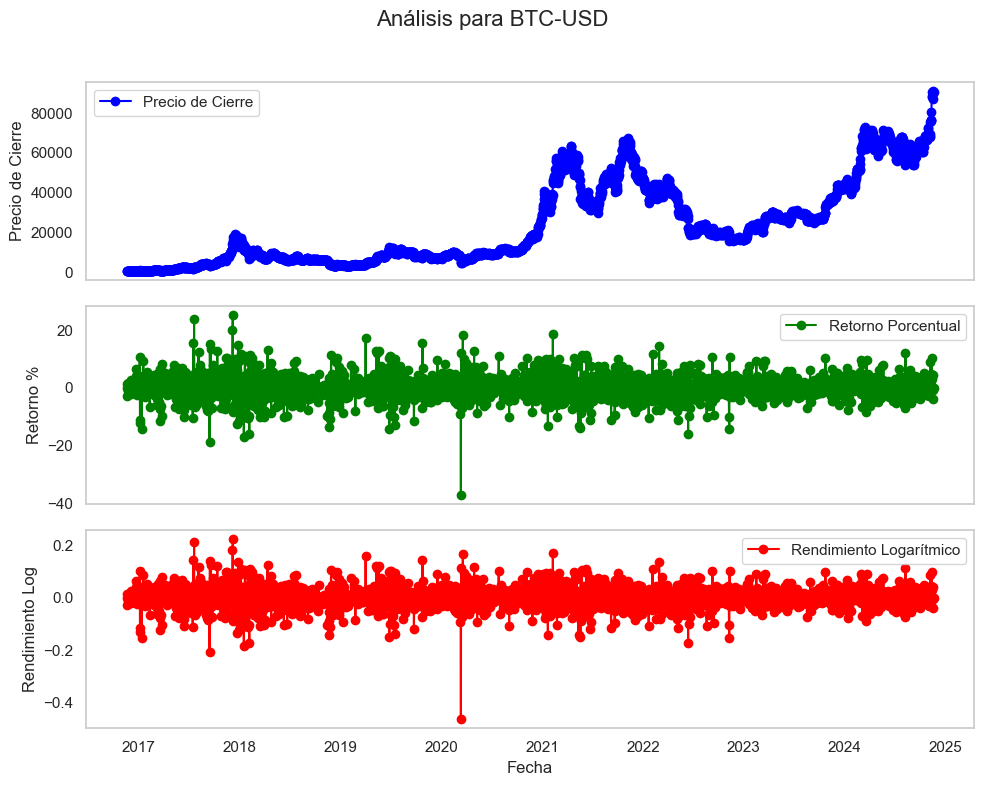

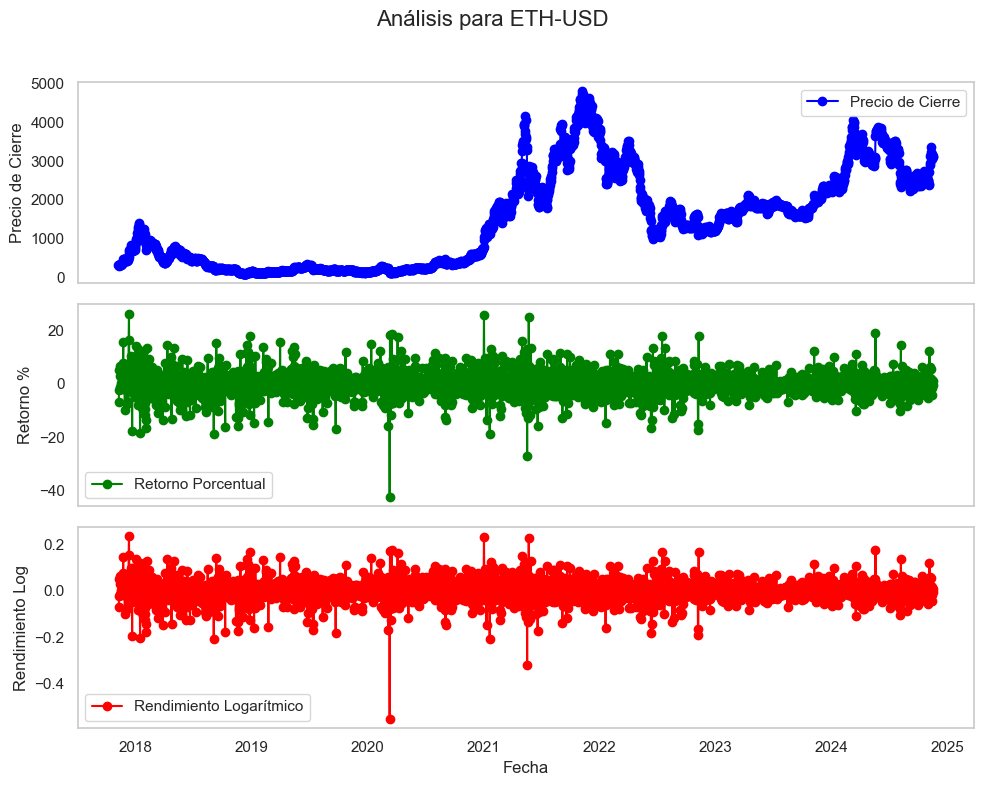

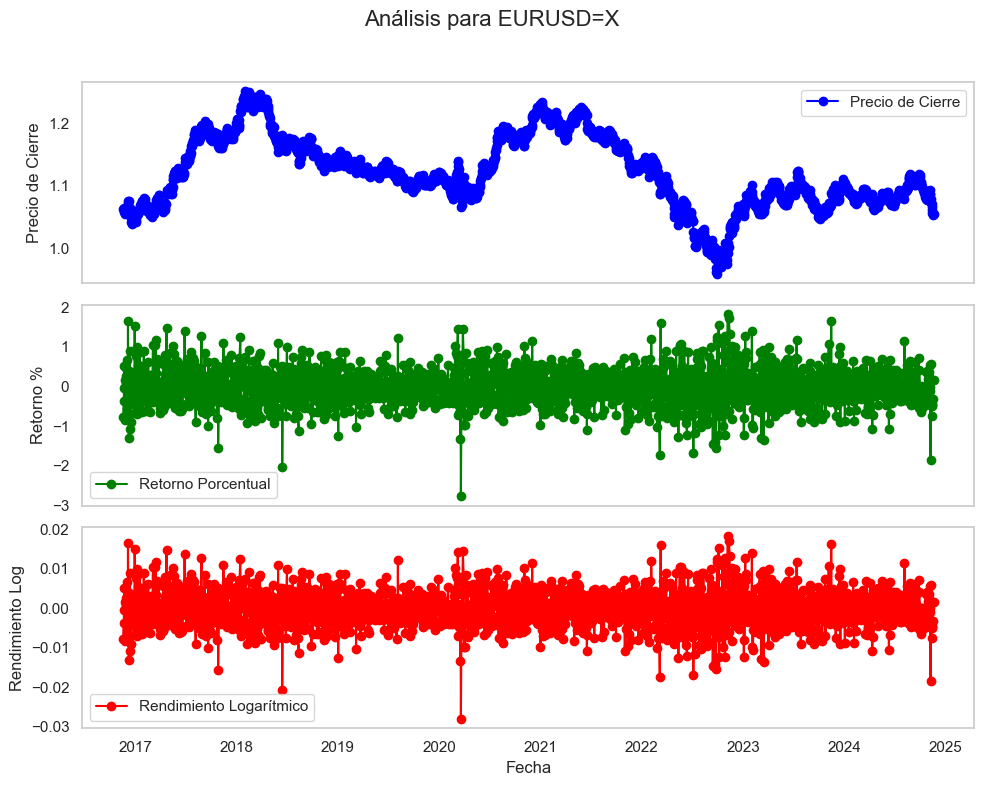

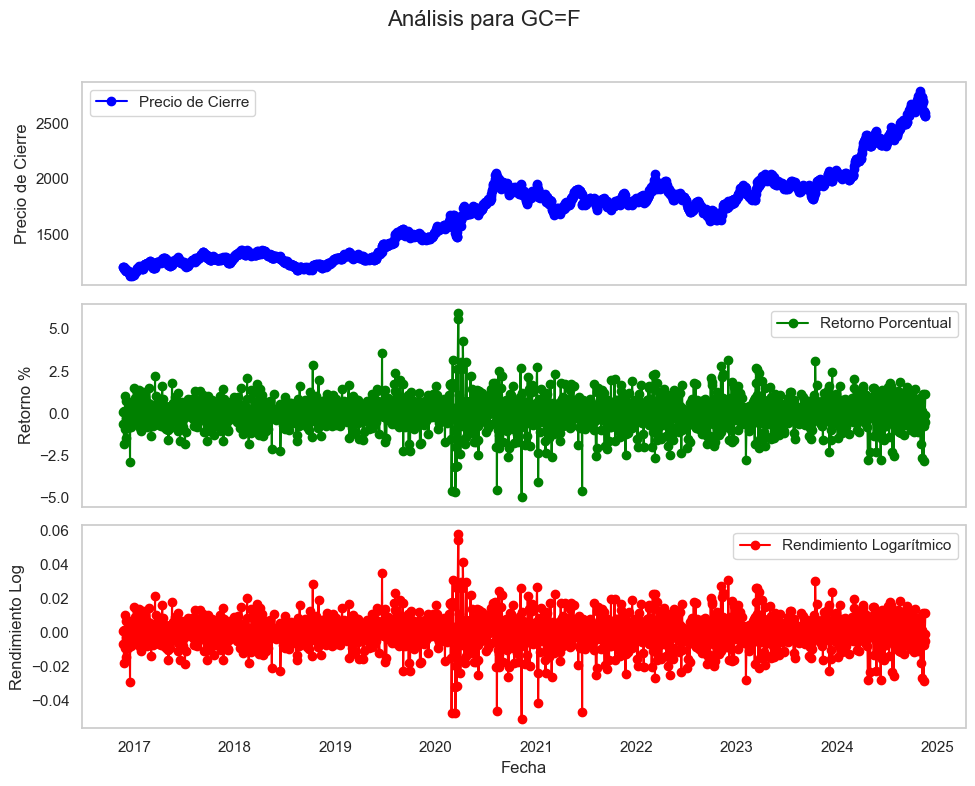

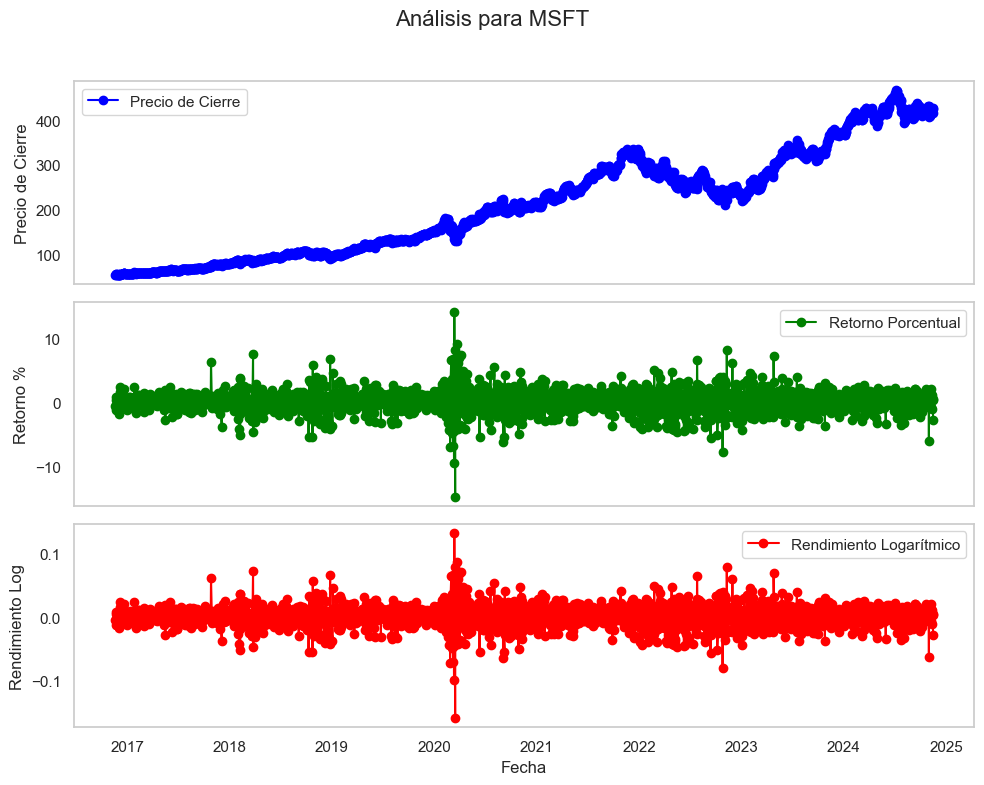

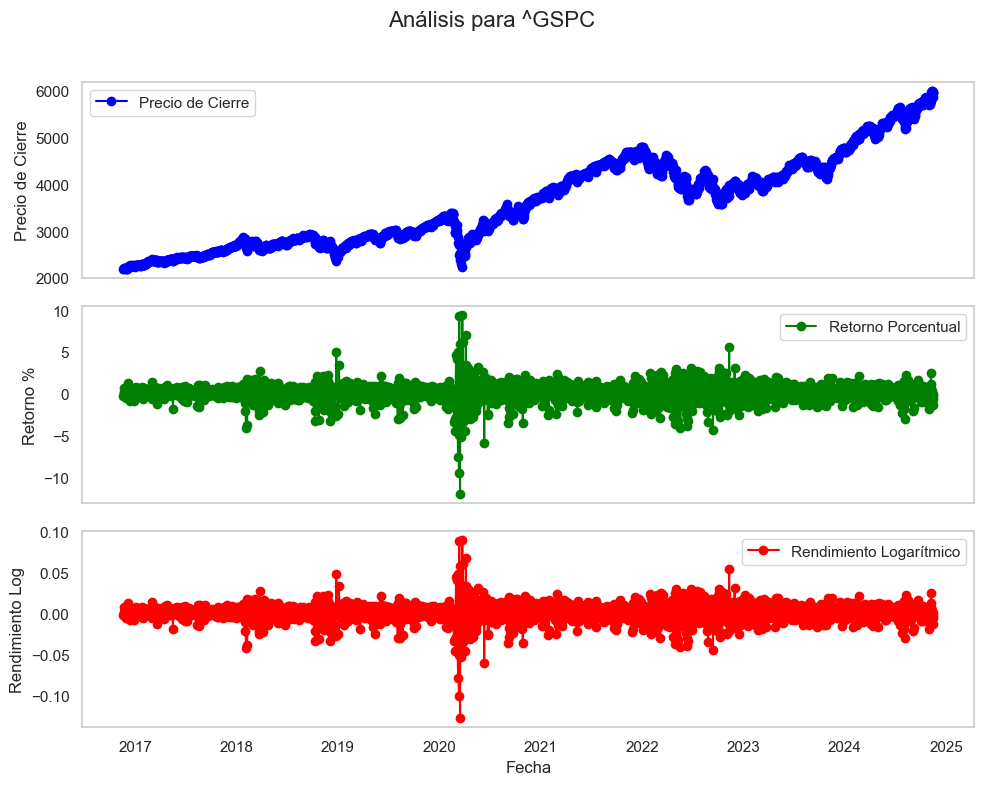

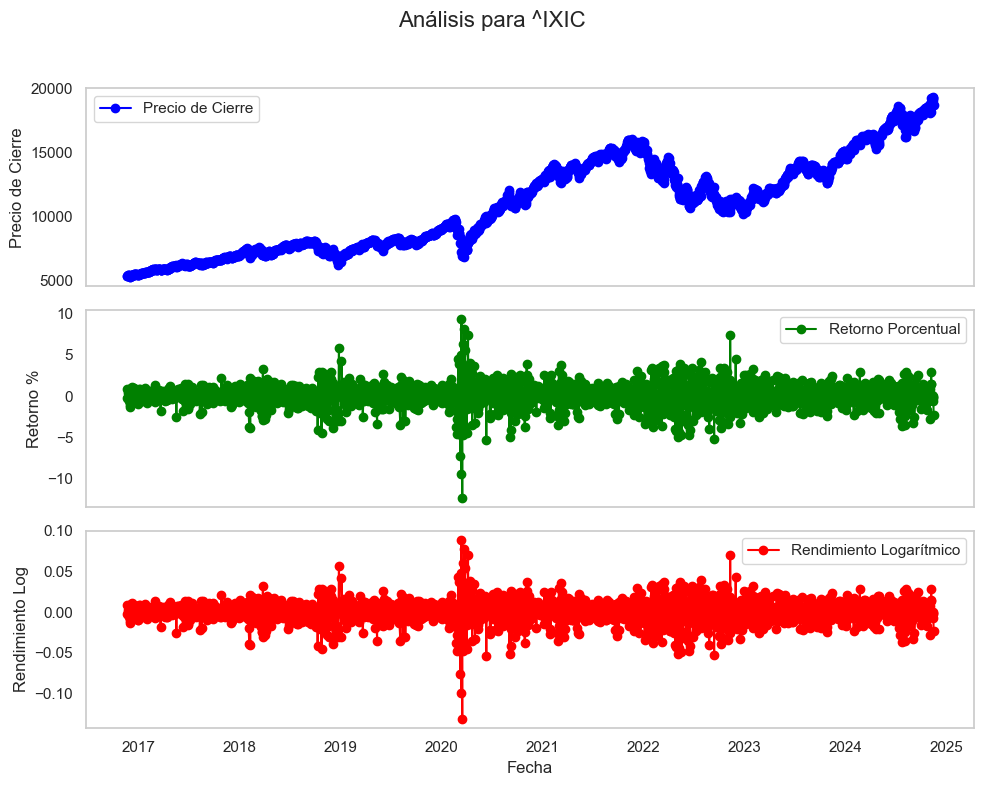

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Graficar por cada símbolo
symbols = df_resultado['Symbol'].unique()

years_ago = pd.Timestamp.today() - pd.DateOffset(years=8)
df_hist_last_years = df_resultado[df_resultado.index >= years_ago]

for symbol in symbols:
    data_symbol = df_hist_last_years[df_hist_last_years['Symbol'] == symbol]

    # Crear figura y ejes
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(f'Análisis para {symbol}', fontsize=16)

    # Precio de cierre
    axes[0].plot(data_symbol.index, data_symbol['Close'], marker='o', label='Precio de Cierre', color='blue')
    axes[0].set_ylabel('Precio de Cierre')
    axes[0].legend()
    axes[0].grid()

    # Retorno porcentual
    axes[1].plot(data_symbol.index, data_symbol['Retorno_Porcentual'], marker='o', label='Retorno Porcentual', color='green')
    axes[1].set_ylabel('Retorno %')
    axes[1].legend()
    axes[1].grid()

    # Rendimiento logarítmico
    axes[2].plot(data_symbol.index, data_symbol['Rendimiento_Log'], marker='o', label='Rendimiento Logarítmico', color='red')
    axes[2].set_ylabel('Rendimiento Log')
    axes[2].set_xlabel('Fecha')
    axes[2].legend()
    axes[2].grid()

    # Mostrar gráfico
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

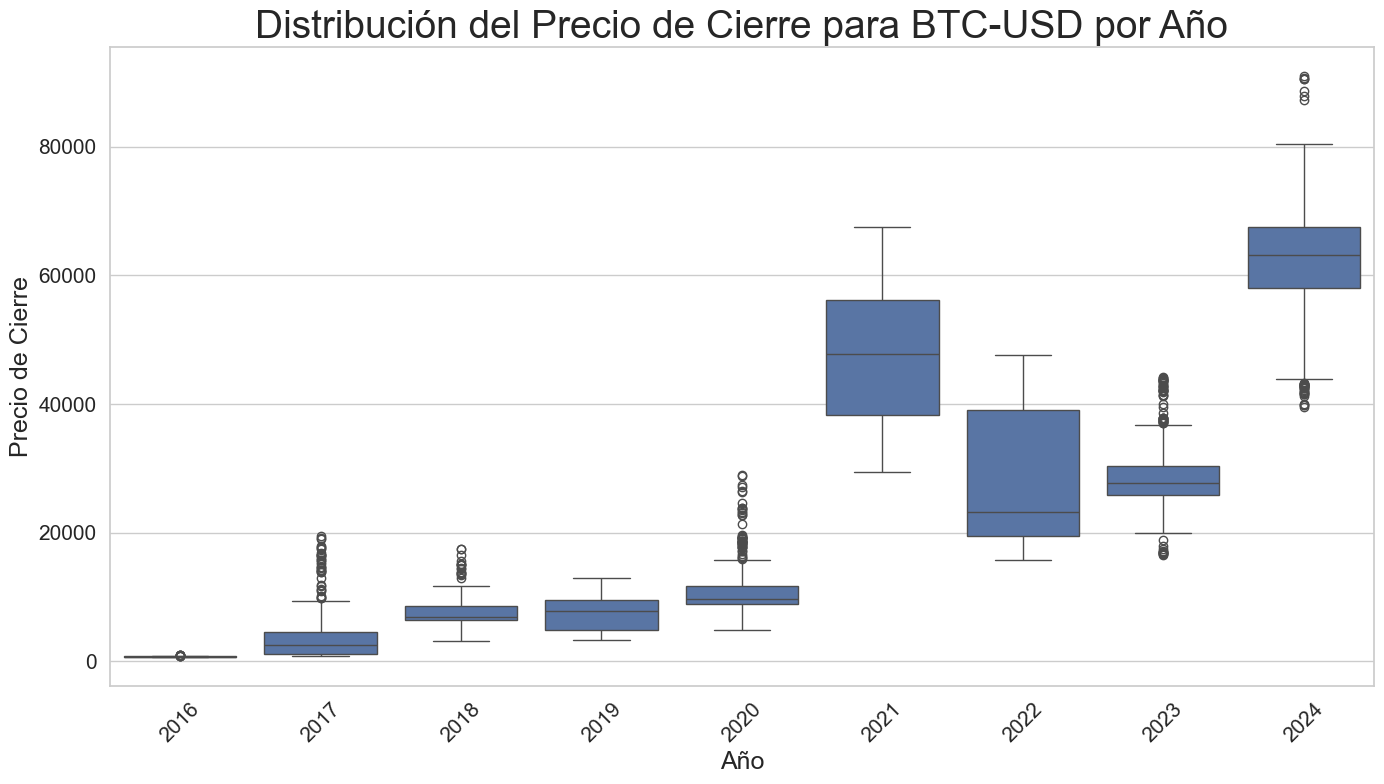

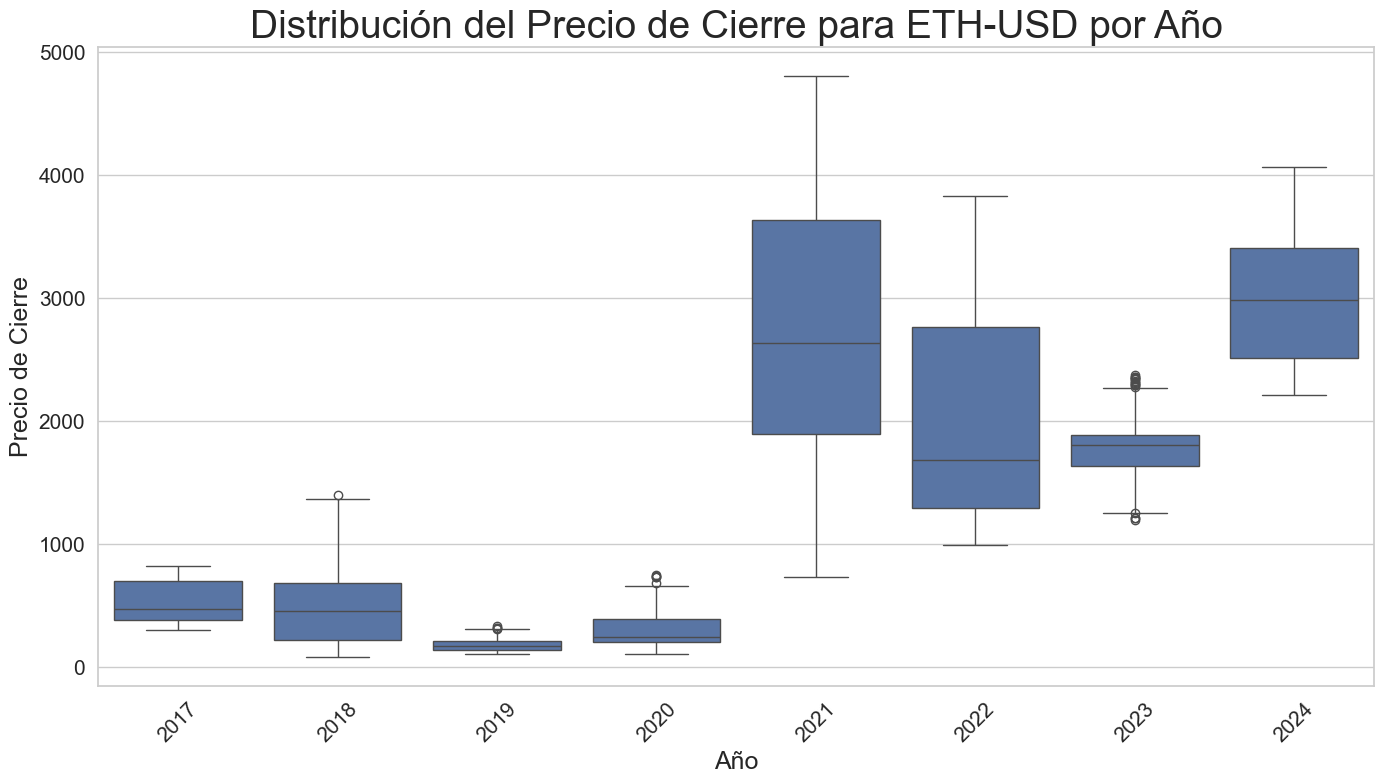

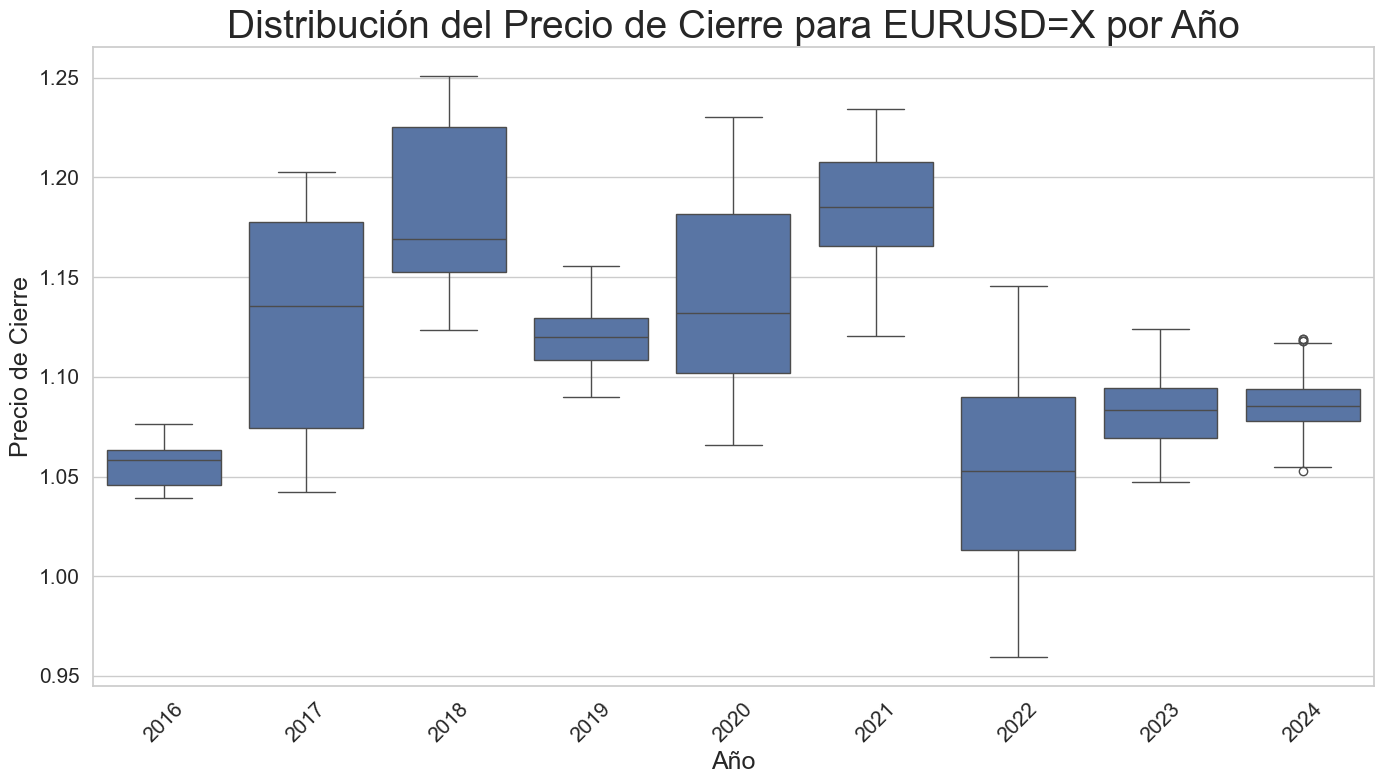

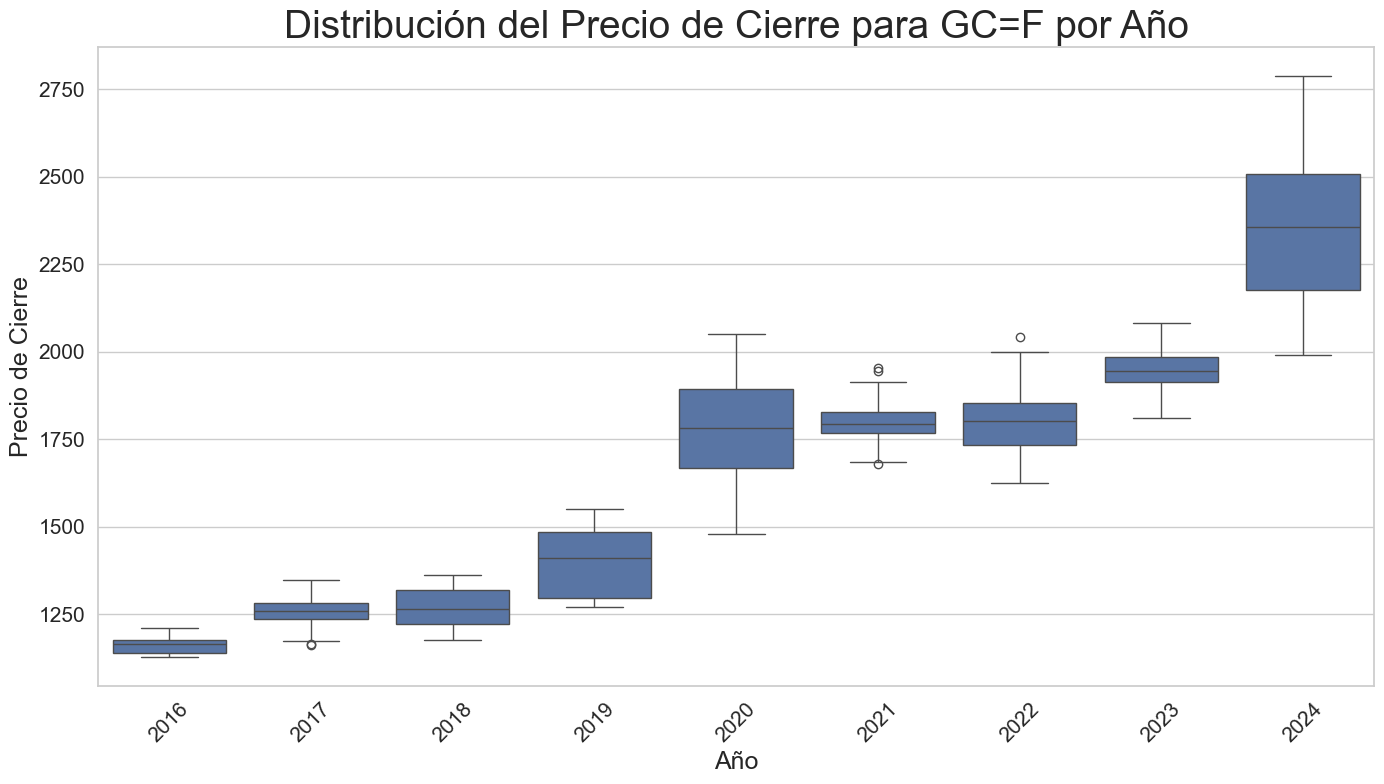

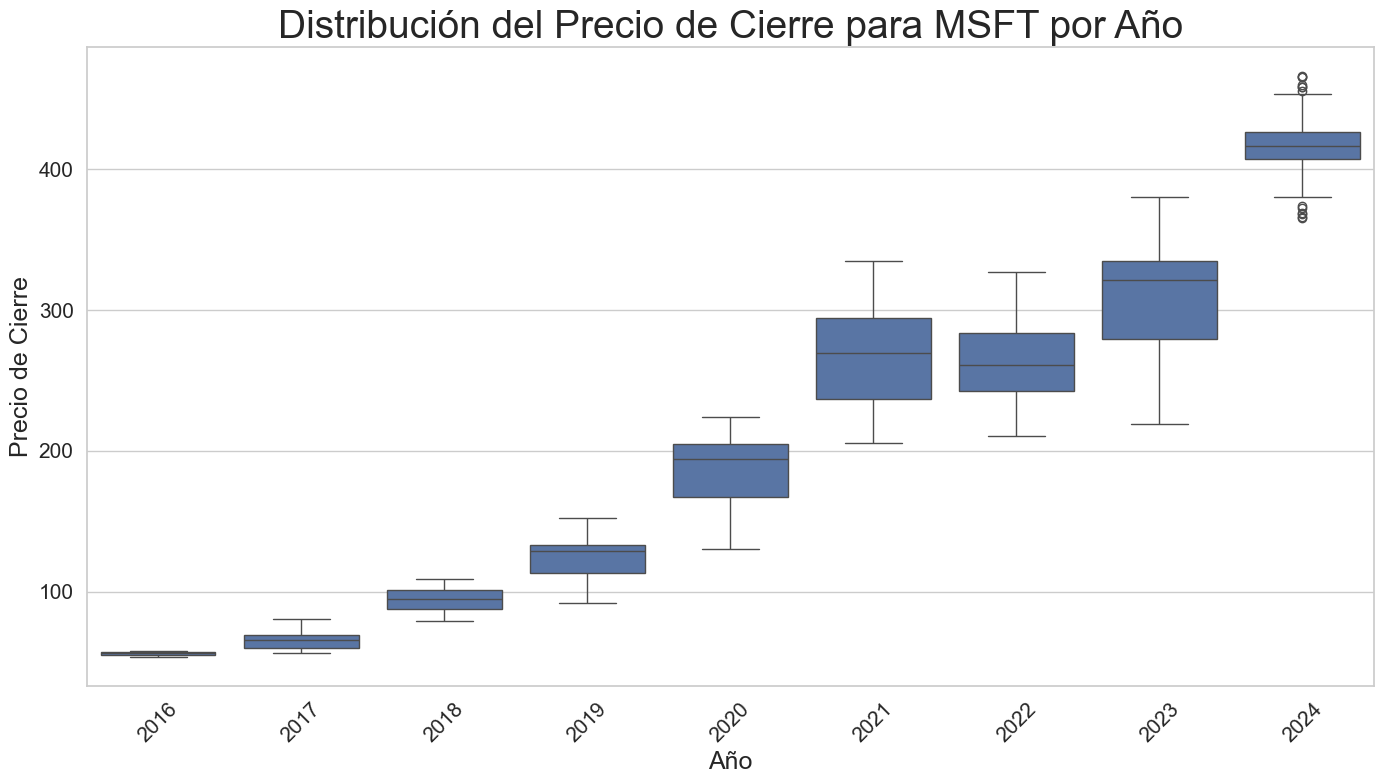

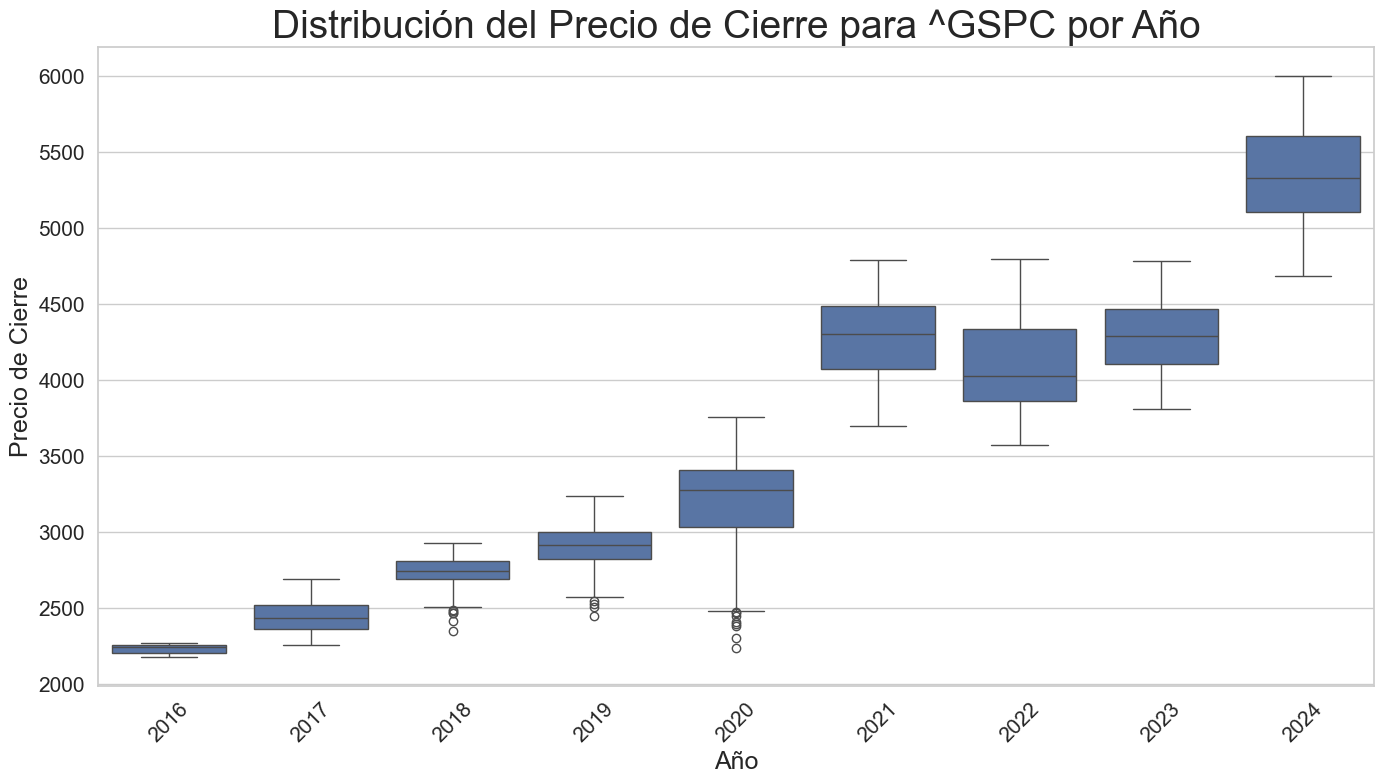

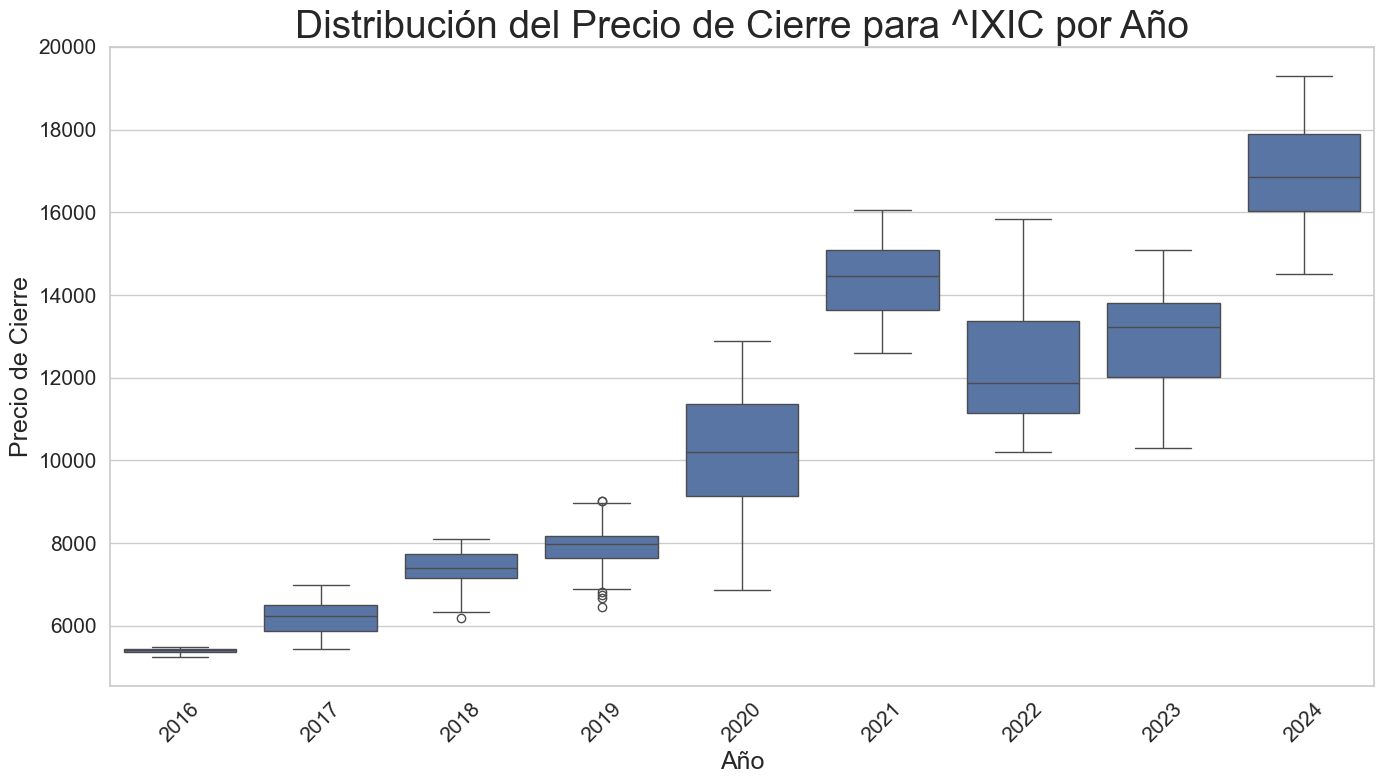

In [31]:
# Filtrar los datos para los últimos 10 años
years_ago = pd.Timestamp.today() - pd.DateOffset(years=8)
df_hist_last_years = df_resultado[df_resultado.index >= years_ago]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Obtener los símbolos únicos
symbols = df_hist_last_years['Symbol'].unique()

# Definir constantes para aumentar el tamaño
title_size_factor = 2   # Factor para el tamaño del título
axis_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ejes
tick_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ticks

# Crear un gráfico independiente para cada símbolo
for symbol in symbols:
    plt.figure(figsize=(14, 8))
    symbol_data = df_hist_last_years[df_hist_last_years['Symbol'] == symbol]
    
    # Crear un boxplot para el precio de cierre por año
    sns.boxplot(data=symbol_data, x='Year', y='Close')
    
    # Establecer el tamaño de los títulos y etiquetas dinámicamente
    plt.title(f"Distribución del Precio de Cierre para {symbol} por Año", fontsize=14 * title_size_factor)
    plt.xlabel("Año", fontsize=12 * axis_label_size_factor)
    plt.ylabel("Precio de Cierre", fontsize=12 * axis_label_size_factor)
    
    # Aumentar el tamaño de las etiquetas de los ticks
    plt.xticks(rotation=45, fontsize=10 * tick_label_size_factor)
    plt.yticks(fontsize=10 * tick_label_size_factor)
    
    # Ajustar la disposición y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [ ]:
# Filtrar valores nulos (primer valor de cada símbolo tendrá NaN en retorno)
df_resultado = df_resultado.dropna(subset=['Retorno_Porcentual'])

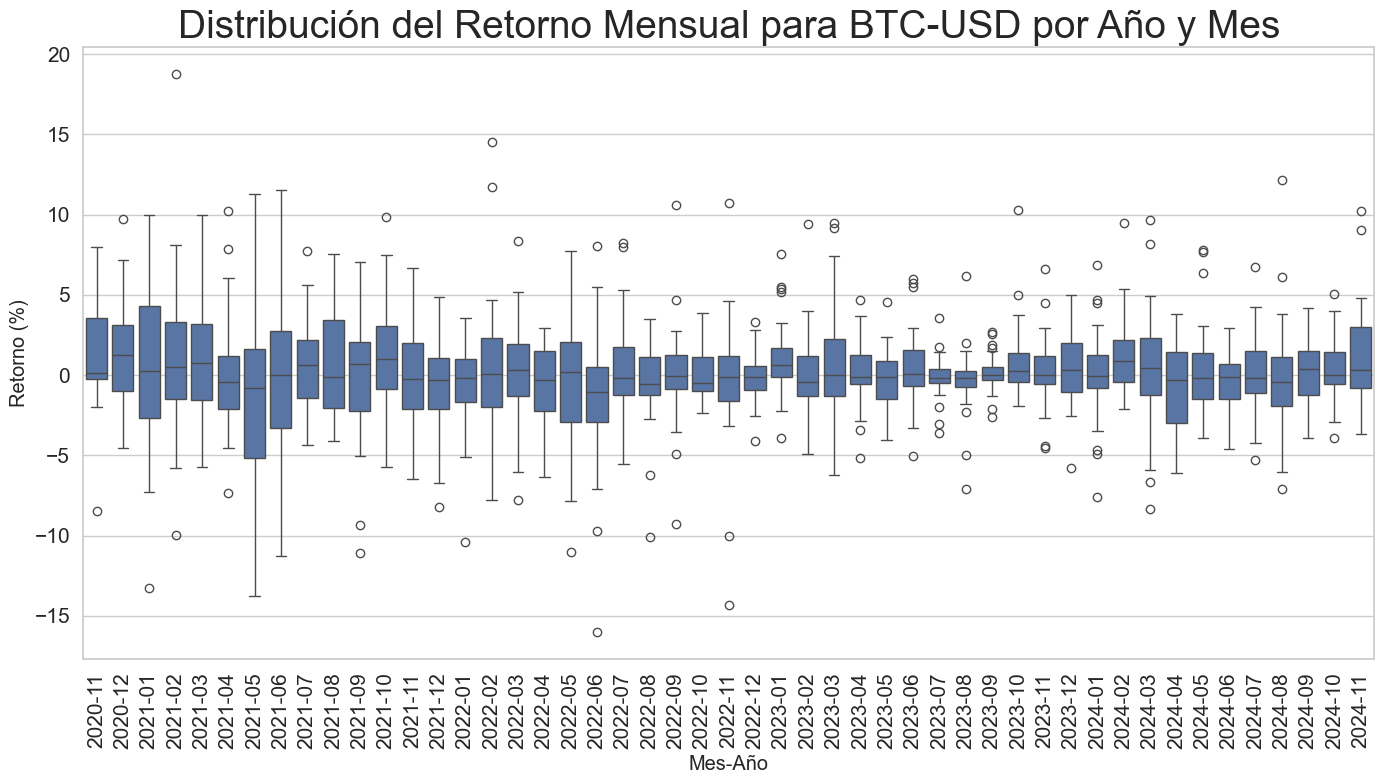

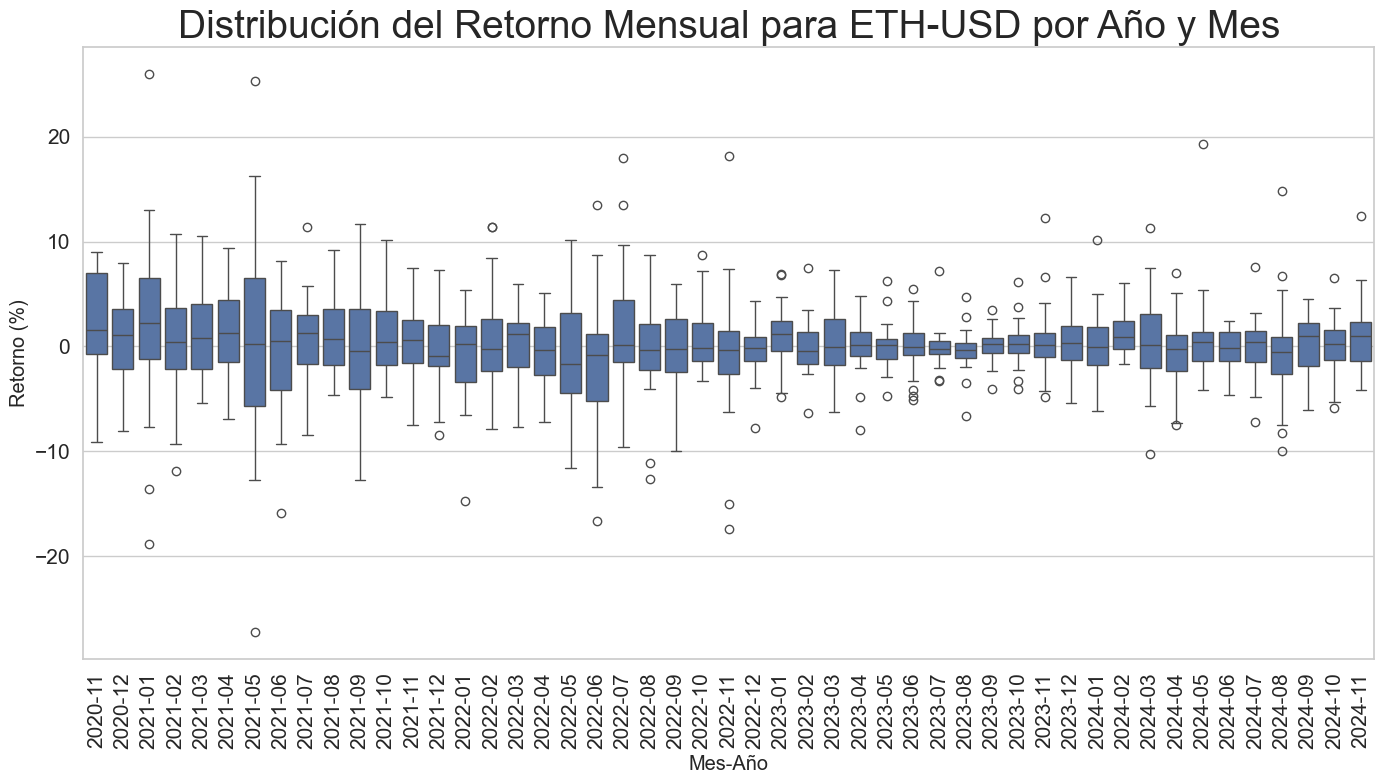

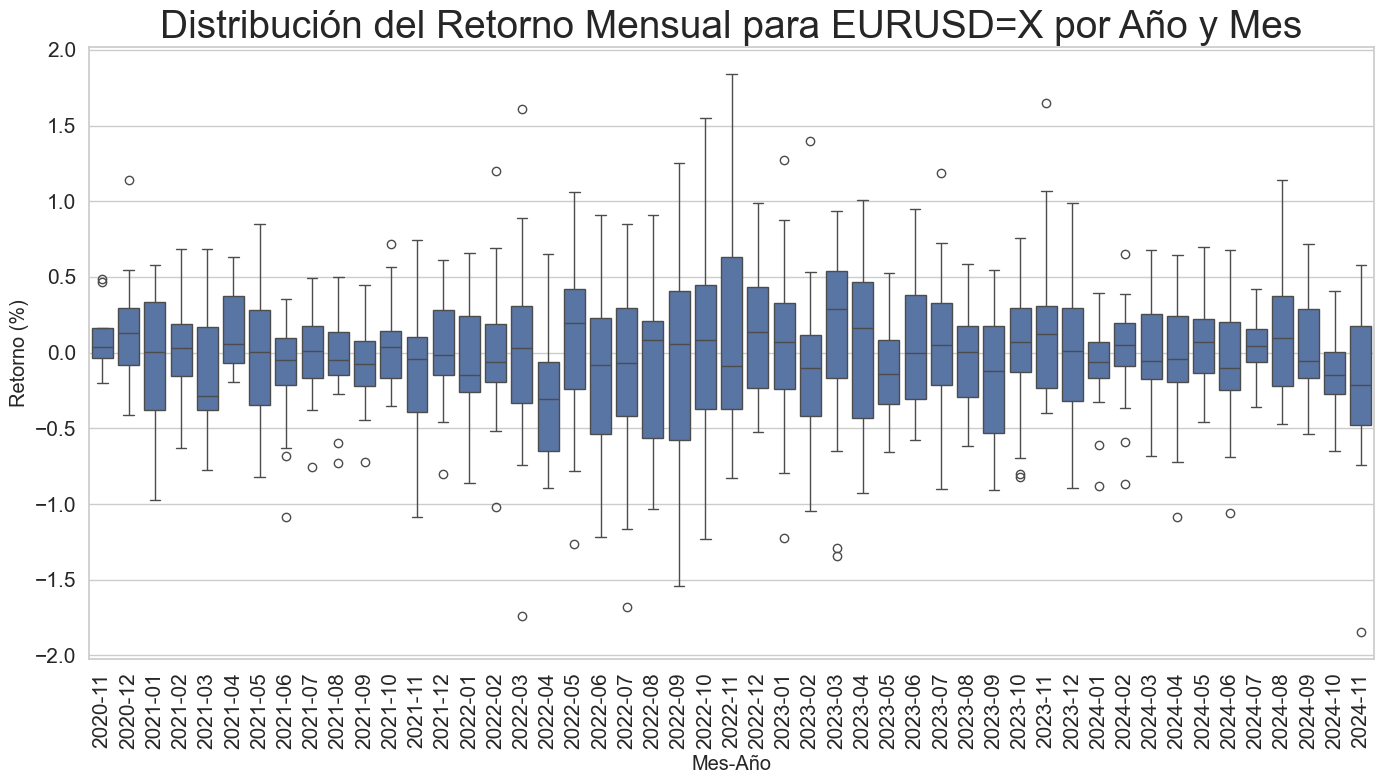

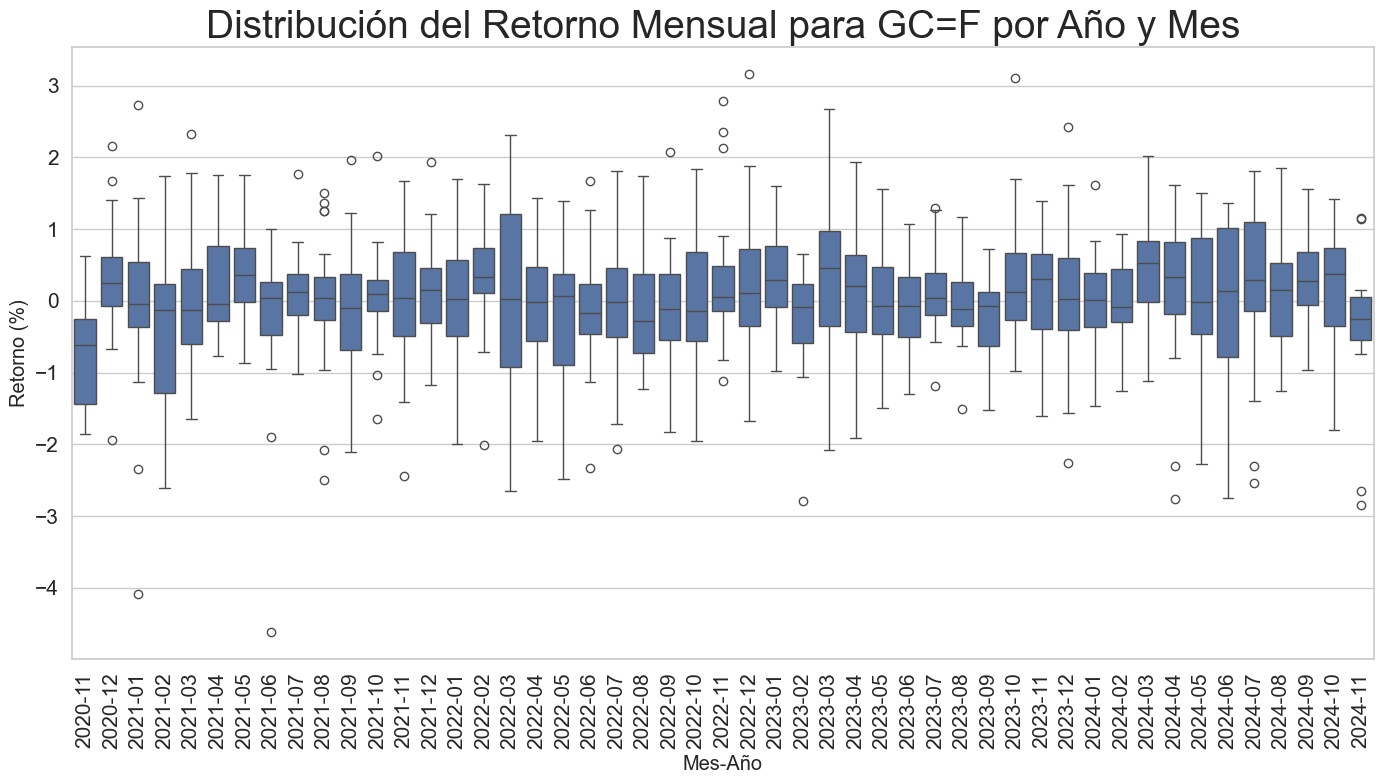

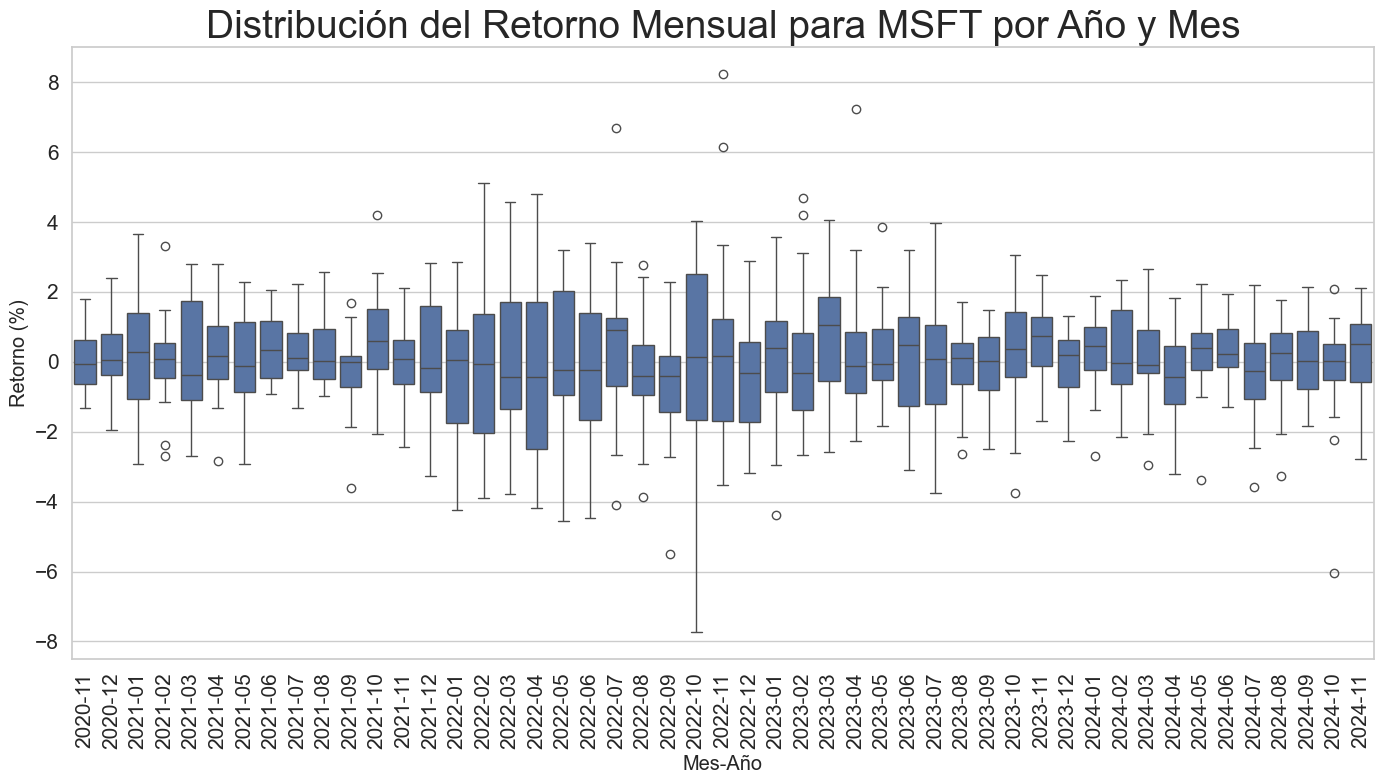

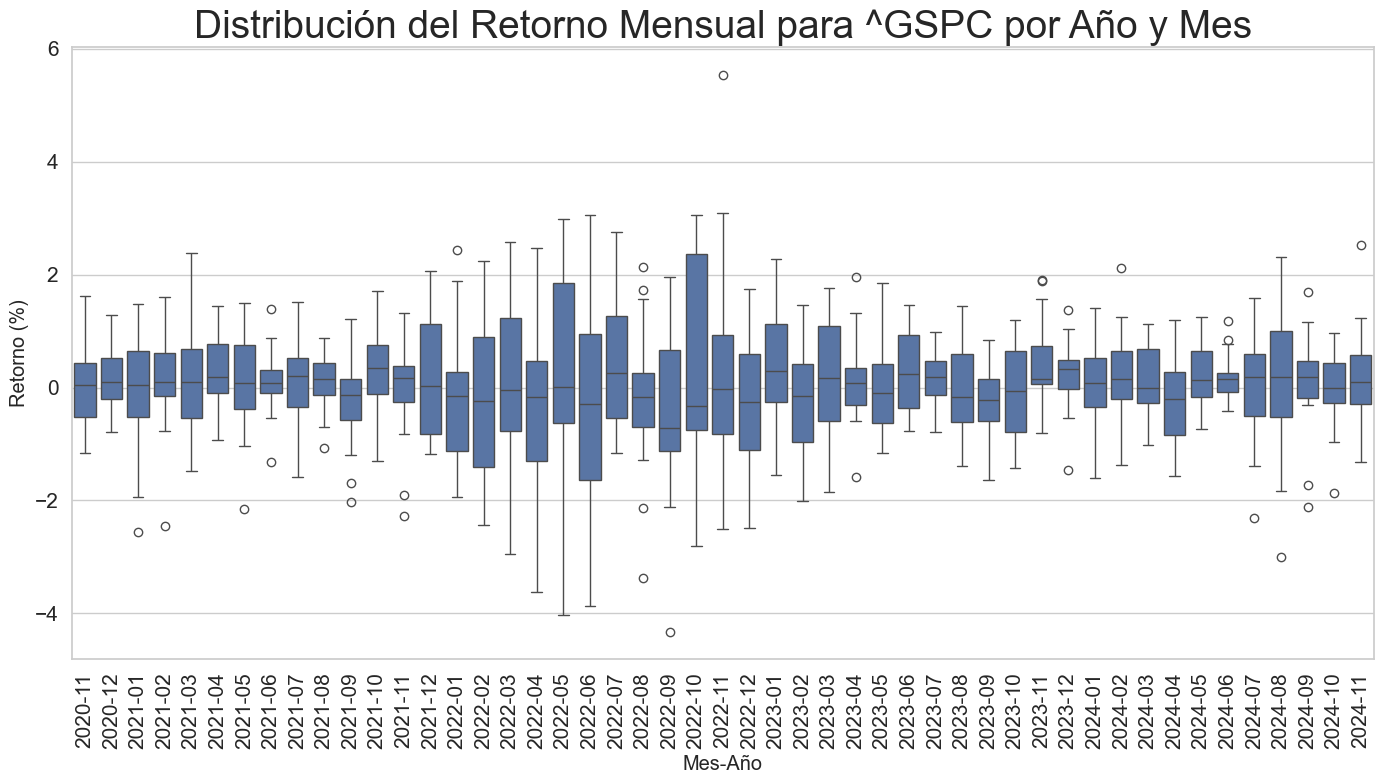

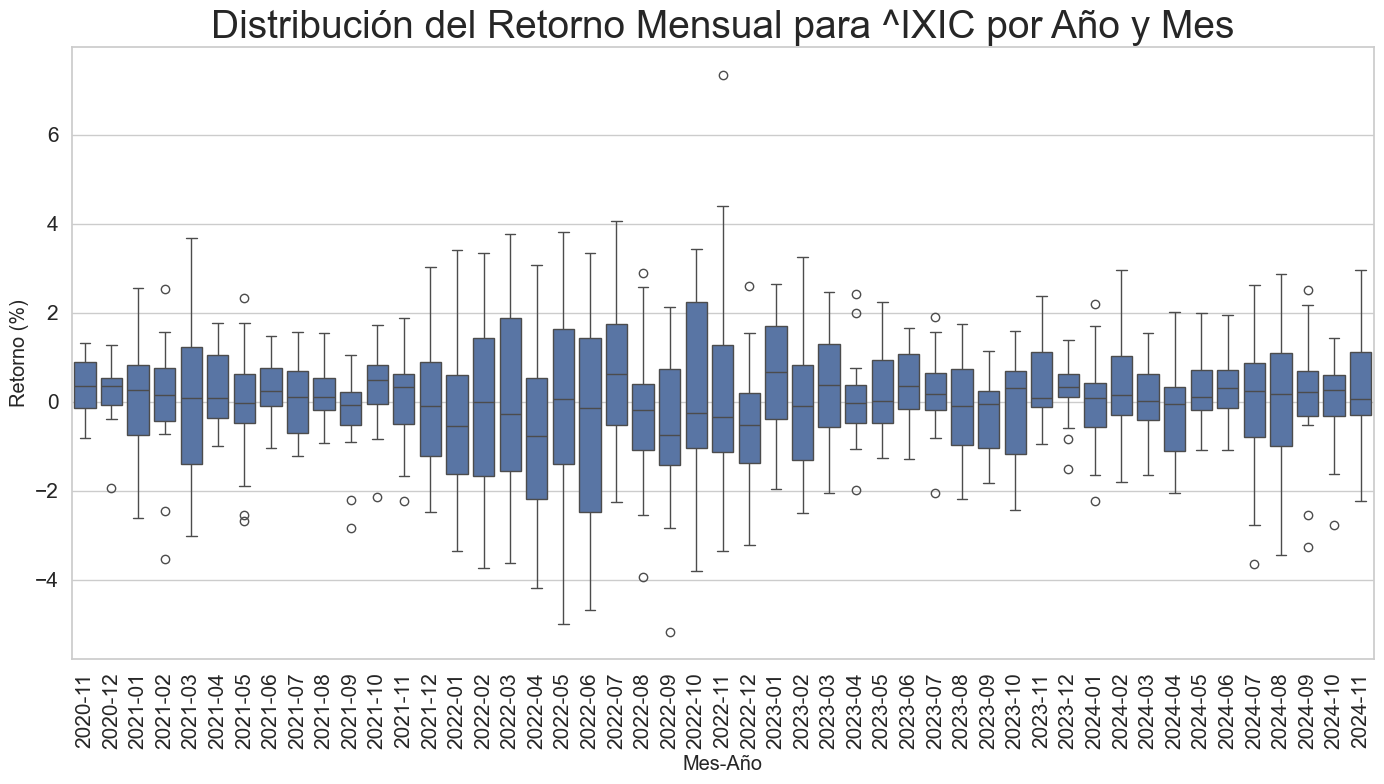

In [24]:
# Filtrar los datos para los últimos 10 años
ten_years_ago = pd.Timestamp.today() - pd.DateOffset(years=4)
df_hist_last_10_years = df_resultado[df_resultado.index >= ten_years_ago]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Obtener los símbolos únicos
symbols = df_hist_last_10_years['Symbol'].unique()

# Definir constantes para aumentar el tamaño
title_size_factor = 2   # Factor para el tamaño del título
axis_label_size_factor = 1.2  # Factor para el tamaño de las etiquetas de los ejes
tick_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ticks

# Crear un gráfico independiente para cada símbolo
for symbol in symbols:
    plt.figure(figsize=(14, 8))
    symbol_data = df_hist_last_10_years[df_hist_last_10_years['Symbol'] == symbol]
    
    # Eliminar valores nulos que aparecen debido al cálculo de los retornos
    symbol_data = symbol_data.dropna(subset=['Retorno_Porcentual'])
    
    # Crear un boxplot para los retornos por año y mes
    sns.boxplot(data=symbol_data, x='YearMonth', y='Retorno_Porcentual')
    
    # Establecer el tamaño de los títulos y etiquetas dinámicamente
    plt.title(f"Distribución del Retorno Mensual para {symbol} por Año y Mes", fontsize=14 * title_size_factor)
    plt.xlabel("Mes-Año", fontsize=12 * axis_label_size_factor)
    plt.ylabel("Retorno (%)", fontsize=12 * axis_label_size_factor)
    
    # Aumentar el tamaño de las etiquetas de los ticks
    plt.xticks(rotation=90, fontsize=10 * tick_label_size_factor)
    plt.yticks(fontsize=10 * tick_label_size_factor)
    
    # Ajustar la disposición y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [38]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt


returns = df_resultado['Rendimiento_Log'].dropna()

# Dividir en entrenamiento y prueba
train_size = int(len(returns) * 0.8)
train_returns = returns[:train_size]
test_returns = returns[train_size:]

# Rango de parámetros p y q
p_values = range(1, 4)  # Cambiar según sea necesario
q_values = range(1, 4)

# Variables para almacenar los resultados
best_aic = np.inf
best_bic = np.inf
best_model = None
best_p = None
best_q = None

# Iterar sobre todas las combinaciones de p y q
for p in p_values:
    for q in q_values:
        try:
            # Entrenar modelo GARCH(p, q)
            model = arch_model(train_returns, vol='Garch', p=p, q=q, mean='Zero', dist='Normal')
            fitted = model.fit(disp="off")

            # Comparar criterios AIC y BIC
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_bic = fitted.bic
                best_model = fitted
                best_p = p
                best_q = q
        except Exception as e:
            print(f"Error con p={p}, q={q}: {e}")

# Resultados del mejor modelo
print(f"Mejor modelo: GARCH({best_p}, {best_q})")
print(f"AIC: {best_aic}, BIC: {best_bic}")
print(best_model.summary())

c:\repos\eda_anteproyecto\.venv\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\repos\eda_anteproyecto\.venv\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\repos\eda_anteproyecto\.venv\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\repos\eda_anteproyecto\.venv\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\repos

Mejor modelo: GARCH(2, 3)
AIC: -312638.40422471985, BIC: -312585.2096375924
                       Zero Mean - GARCH Model Results                        
Dep. Variable:        Rendimiento_Log   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                156325.
Distribution:                  Normal   AIC:                          -312638.
Method:            Maximum Likelihood   BIC:                          -312585.
                                        No. Observations:                52353
Date:                Sun, Nov 17 2024   Df Residuals:                    52353
Time:                        22:22:52   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-----------------------------------------------------------


Prueba de Ljung-Box:
      lb_stat     lb_pvalue
10  98.541399  1.066874e-16


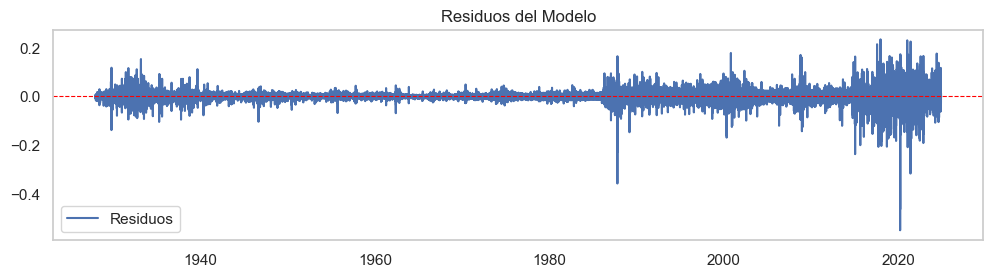

In [40]:
# Validar residuos con prueba de Ljung-Box
residuals = best_model.resid
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nPrueba de Ljung-Box:")
print(lb_test)

# Graficar residuos y volatilidad condicional
plt.figure(figsize=(12, 6))

# Residuos
plt.subplot(2, 1, 1)
plt.plot(residuals, label='Residuos')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title('Residuos del Modelo')
plt.grid()
plt.legend()


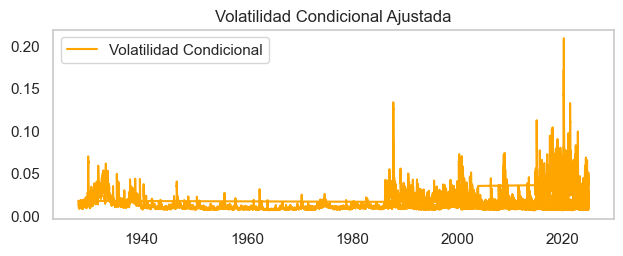

In [41]:
# Volatilidad condicional
plt.subplot(2, 1, 2)
plt.plot(best_model.conditional_volatility, label='Volatilidad Condicional', color='orange')
plt.title('Volatilidad Condicional Ajustada')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

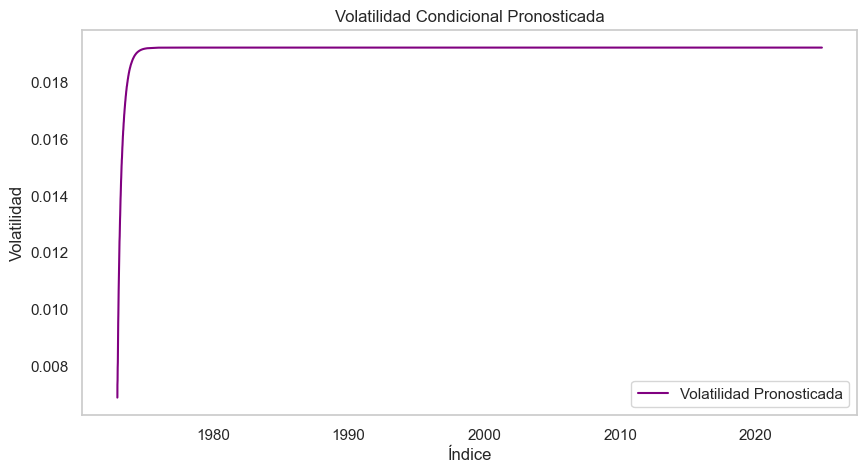

In [42]:
# Predecir la volatilidad condicional en el conjunto de prueba
forecast = best_model.forecast(horizon=len(test_returns), reindex=False)
test_volatility = np.sqrt(forecast.variance.values[-1, :])

# Graficar volatilidad condicional pronosticada
plt.figure(figsize=(10, 5))
plt.plot(test_returns.index, test_volatility, label='Volatilidad Pronosticada', color='purple')
plt.title('Volatilidad Condicional Pronosticada')
plt.xlabel('Índice')
plt.ylabel('Volatilidad')
plt.grid()
plt.legend()
plt.show()

In [25]:
type(bitcoin.history_metadata)

dict

In [86]:
bitcoin.history_metadata.keys()

dict_keys(['currency', 'symbol', 'exchangeName', 'fullExchangeName', 'instrumentType', 'firstTradeDate', 'regularMarketTime', 'hasPrePostMarketData', 'gmtoffset', 'timezone', 'exchangeTimezoneName', 'regularMarketPrice', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume', 'longName', 'shortName', 'chartPreviousClose', 'priceHint', 'currentTradingPeriod', 'dataGranularity', 'range', 'validRanges'])

In [101]:
# Definir los símbolos de los activos
symbols = ["MSFT", "BTC-USD", "ETH-USD", "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Claves importantes para el análisis técnico y fundamental
keys_to_select = [
    "currency", "symbol", "exchangeName", "instrumentType", "regularMarketPrice",
    "fiftyTwoWeekHigh", "fiftyTwoWeekLow", "regularMarketDayHigh", "regularMarketDayLow",
    "regularMarketVolume", "longName", "shortName", "chartPreviousClose", "priceHint",
    "validRanges"
]

# Lista para almacenar los datos de cada ticker
all_data = []

# Iterar sobre cada símbolo en la lista
for symbol in symbols:
    # Obtener el ticker
    ticker = yf.Ticker(symbol)
    
    # Obtener los metadatos históricos
    history_metadata = ticker.history_metadata
    
    # Filtrar los datos relevantes
    filtered_data = {key: history_metadata.get(key) for key in keys_to_select}
    
    # Añadir el símbolo del ticker
    filtered_data['symbol'] = symbol
    
    # Agregar los datos filtrados a la lista
    all_data.append(filtered_data)

# Convertir la lista de diccionarios en un DataFrame
df_history_metadata = pd.DataFrame(all_data)
df_history_metadata[[
    "symbol", "instrumentType", "fiftyTwoWeekHigh", 
    "fiftyTwoWeekLow", "regularMarketDayHigh", "regularMarketDayLow", "longName"]]

,symbol,instrumentType,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketDayHigh,regularMarketDayLow,longName
0,MSFT,EQUITY,468.3500,362.9000,428.1600,420.0000,Microsoft Corporation
1,BTC-USD,CRYPTOCURRENCY,93434.3500,35670.9730,88451.5400,87305.7100,Bitcoin USD
2,ETH-USD,CRYPTOCURRENCY,4092.2840,1910.4450,3091.5090,3038.3690,Ethereum USD
3,^GSPC,INDEX,6017.3100,4499.6600,5993.8800,5942.2800,S&P 500
4,^IXIC,INDEX,19366.0700,14058.5200,19275.8050,19073.3930,NASDAQ Composite
5,GC=F,FUTURE,2789.0000,1969.7000,2576.5000,2567.6000,None
6,EURUSD=X,CURRENCY,1.1212,1.0499,1.0549,1.0526,EUR/USD


In [52]:
msft = yf.Ticker("MSFT")
# show actions (dividends, splits, capital gains)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0
2024-02-14 00:00:00-05:00,0.75,0.0


In [54]:
msft.dividends


Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
2024-02-14 00:00:00-05:00    0.75
2024-05-15 00:00:00-04:00    0.75
2024-08-15 00:00:00-04:00    0.75
Name: Dividends, Length: 83, dtype: float64

In [55]:
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

In [56]:
msft.capital_gains  # only for mutual funds & etfs

Series([], dtype: object)

In [121]:
msft.calendar

{'Dividend Date': datetime.date(2024, 12, 11),
 'Ex-Dividend Date': datetime.date(2024, 11, 20),
 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)],
 'Earnings High': 3.47,
 'Earnings Low': 3.08,
 'Earnings Average': 3.16286,
 'Revenue High': 70520000000,
 'Revenue Low': 68488700000,
 'Revenue Average': 68937174200}

In [132]:
pd_news = pd.DataFrame(msft.news)
pd_news[["title", "link" , "type" , "relatedTickers"]]

,title,link,type,relatedTickers
0,"Bill Gates Adjusts Portfolio, Major Reduction ...",https://finance.yahoo.com/news/bill-gates-adju...,STORY,[MSFT]
1,"Jeff Auxier Adjusts Portfolio in Q3 2024, with...",https://finance.yahoo.com/news/jeff-auxier-adj...,STORY,[MSFT]
2,Microsoft Stock Up 3rd Straight Session Despit...,https://finance.yahoo.com/m/f64f92ee-04f5-36b3...,STORY,[MSFT]
3,FTC plans to probe Microsoft's cloud business:...,https://finance.yahoo.com/video/ftc-plans-prob...,VIDEO,[MSFT]
4,Microsoft Corporation (MSFT) Leverages AI to B...,https://finance.yahoo.com/news/microsoft-corpo...,STORY,[MSFT]
5,Microsoft Confident in Long-Term AI Investment...,https://finance.yahoo.com/news/microsoft-confi...,STORY,[MSFT]
6,Market Chatter: US FTC Plans to Probe Microsof...,https://finance.yahoo.com/news/market-chatter-...,STORY,[MSFT]
7,US FTC plans to investigate Microsoft's cloud ...,https://finance.yahoo.com/news/us-regulators-p...,STORY,[MSFT]


In [127]:
pd.DataFrame(msft.calendar)

,Dividend Date,Ex-Dividend Date,Earnings Date,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average
0,2024-12-11,2024-11-20,2025-01-28,3.47,3.08,3.16286,70520000000,68488700000,68937174200
1,2024-12-11,2024-11-20,2025-02-03,3.47,3.08,3.16286,70520000000,68488700000,68937174200


In [128]:
pd.DataFrame(msft.quarterly_income_stmt)

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30
Tax Effect Of Unusual Items,57190000.0,-16263853.211009,-33660000.0,-29160000.0,-20700000.0
Tax Rate For Calcs,0.19,0.191339,0.18,0.18,0.18
Normalized EBITDA,37933000000.0,34416000000.0,33741000000.0,33556000000.0,31845000000.0
Total Unusual Items,301000000.0,-85000000.0,-187000000.0,-162000000.0,-115000000.0
Total Unusual Items Excluding Goodwill,301000000.0,-85000000.0,-187000000.0,-162000000.0,-115000000.0
Net Income From Continuing Operation Net Minority Interest,24667000000.0,22036000000.0,21939000000.0,21870000000.0,22291000000.0
Reconciled Depreciation,7383000000.0,6380000000.0,6027000000.0,5959000000.0,3921000000.0
Reconciled Cost Of Revenue,20099000000.0,19684000000.0,18505000000.0,19623000000.0,16302000000.0
EBITDA,38234000000.0,34331000000.0,33554000000.0,33394000000.0,31730000000.0
EBIT,30851000000.0,27951000000.0,27527000000.0,27435000000.0,27809000000.0


In [129]:
pd.DataFrame(msft.quarterly_balance_sheet)

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30
Ordinary Shares Number,7436000000.0,7434000000.0,7432305794.0,7431612107.0,7431000000.0,NaN
Share Issued,7436000000.0,7434000000.0,7432305794.0,7431612107.0,7431000000.0,NaN
Net Debt,24277000000.0,33315000000.0,45808000000.0,56914000000.0,NaN,12533000000.0
Total Debt,61478000000.0,67127000000.0,79911000000.0,88374000000.0,84989000000.0,NaN
Tangible Book Value,141598000000.0,121660000000.0,105161000000.0,89441000000.0,144029000000.0,NaN
...,...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,78429000000.0,75531000000.0,80013000000.0,80982000000.0,143945000000.0,NaN
Other Short Term Investments,57589000000.0,57216000000.0,60379000000.0,63677000000.0,63493000000.0,NaN
Cash And Cash Equivalents,20840000000.0,18315000000.0,19634000000.0,17305000000.0,80452000000.0,NaN
Cash Equivalents,10252000000.0,6744000000.0,8053000000.0,7769000000.0,73074000000.0,NaN


In [130]:
pd.DataFrame(msft.quarterly_cashflow)

,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30
Free Cash Flow,19257000000.0,23322000000.0,20965000000.0,9118000000.0,20666000000.0
Repurchase Of Capital Stock,-4107000000.0,-4210000000.0,-4213000000.0,-4000000000.0,-4831000000.0
Repayment Of Debt,-966000000.0,-13065000000.0,-11589000000.0,-2916000000.0,-1500000000.0
Issuance Of Debt,0.0,5447000000.0,6352000000.0,10773000000.0,7073000000.0
Issuance Of Capital Stock,706000000.0,534000000.0,522000000.0,261000000.0,685000000.0
Capital Expenditure,-14923000000.0,-13873000000.0,-10952000000.0,-9735000000.0,-9917000000.0
End Cash Position,20840000000.0,18315000000.0,19634000000.0,17305000000.0,80452000000.0
Beginning Cash Position,18315000000.0,19634000000.0,17305000000.0,80452000000.0,34704000000.0
Effect Of Exchange Rate Changes,122000000.0,-103000000.0,-80000000.0,72000000.0,-99000000.0
Changes In Cash,2403000000.0,-1216000000.0,2409000000.0,-63219000000.0,45847000000.0


In [125]:
# Información financiera básica
print(msft.calendar)
print()
print(msft.quarterly_income_stmt)
print()
print(msft.quarterly_balance_sheet)
print()
print(msft.quarterly_cashflow)

{'Dividend Date': datetime.date(2024, 12, 11), 'Ex-Dividend Date': datetime.date(2024, 11, 20), 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)], 'Earnings High': 3.47, 'Earnings Low': 3.08, 'Earnings Average': 3.16286, 'Revenue High': 70520000000, 'Revenue Low': 68488700000, 'Revenue Average': 68937174200}

                                                       2024-09-30  \
Tax Effect Of Unusual Items                            57190000.0   
Tax Rate For Calcs                                           0.19   
Normalized EBITDA                                   37933000000.0   
Total Unusual Items                                   301000000.0   
Total Unusual Items Excluding Goodwill                301000000.0   
Net Income From Continuing Operation Net Minori...  24667000000.0   
Reconciled Depreciation                              7383000000.0   
Reconciled Cost Of Revenue                          20099000000.0   
EBITDA                                       

In [70]:
msft.news

[{'uuid': 'f8eb5424-667c-3a09-ad90-ee71ef6c8849',
  'title': 'Bill Gates Adjusts Portfolio, Major Reduction in Microsoft Corp Shares',
  'publisher': 'GuruFocus.com',
  'link': 'https://finance.yahoo.com/news/bill-gates-adjusts-portfolio-major-020829742.html',
  'providerPublishTime': 1731636509,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/8ptKi_i5HKYYHDUqhDbewA--~B/aD05MDI7dz0xMjQyO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/us.finance.gurufocus/7d6b563ecc889fd1571dbc962f9f226c',
     'width': 1242,
     'height': 902,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/XKnOfgDV6XAvnRqnxyGIQg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/us.finance.gurufocus/7d6b563ecc889fd1571dbc962f9f226c',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['MSFT']},
 {'uuid': 'a26c8050-6b9b-349f-8bf1-0af869504760',
  'title': 'Jeff Auxier Adjusts Port

In [72]:
# Definir los símbolos de los activos
symbols = ["MSFT"]

# Crear una lista para almacenar los DataFrames
all_data = []

# Iterar a través de cada símbolo
for symbol in symbols:
    # Definir el activo
    ticker = yf.Ticker(symbol)
    
    # Crear un diccionario para almacenar los datos
    data_dict = {}
    
    # 1. Mostrar cantidad de acciones en un rango específico
    data_dict['share_count'] = ticker.get_shares_full(start="2022-01-01")

    # 2. Información financiera:
    data_dict['calendar'] = ticker.calendar
    data_dict['sec_filings'] = ticker.sec_filings

    # Estados financieros:
    data_dict['income_statement'] = ticker.income_stmt
    data_dict['quarterly_income_statement'] = ticker.quarterly_income_stmt
    data_dict['balance_sheet'] = ticker.balance_sheet
    data_dict['quarterly_balance_sheet'] = ticker.quarterly_balance_sheet
    data_dict['cash_flow'] = ticker.cashflow
    data_dict['quarterly_cashflow'] = ticker.quarterly_cashflow

    # 3. Holders:
    data_dict['major_holders'] = ticker.major_holders
    data_dict['institutional_holders'] = ticker.institutional_holders
    data_dict['mutual_fund_holders'] = ticker.mutualfund_holders
    data_dict['insider_transactions'] = ticker.insider_transactions
    data_dict['insider_purchases'] = ticker.insider_purchases

    # 4. Sostenibilidad:
    data_dict['sustainability'] = ticker.sustainability

    # 5. Recomendaciones:
    data_dict['recommendations'] = ticker.recommendations
    data_dict['recommendations_summary'] = ticker.recommendations_summary
    data_dict['upgrades_downgrades'] = ticker.upgrades_downgrades

    # 6. Datos de analistas:
    data_dict['analyst_price_targets'] = ticker.analyst_price_targets
    data_dict['earnings_estimate'] = ticker.earnings_estimate
    data_dict['revenue_estimate'] = ticker.revenue_estimate
    data_dict['earnings_history'] = ticker.earnings_history
    data_dict['eps_trend'] = ticker.eps_trend
    data_dict['eps_revisions'] = ticker.eps_revisions
    #data_dict['growth_estimates'] = ticker.growth_estimates

    # 7. Fechas de ingresos (ganancias):
    data_dict['earnings_dates'] = ticker.earnings_dates

    # 8. Expiración de opciones:
    data_dict['options'] = ticker.options

    # 9. Noticias:
    data_dict['news'] = ticker.news

    # 10. Cadena de opciones para una fecha específica (reemplazar 'YYYY-MM-DD' con una fecha de vencimiento disponible)
    if ticker.options:
        expiration_date = ticker.options[0]  # Ejemplo: seleccionar la primera fecha de expiración
        option_chain = ticker.option_chain(expiration_date)
        data_dict['option_chain_calls'] = option_chain.calls
        data_dict['option_chain_puts'] = option_chain.puts

In [79]:
# Definir los símbolos de los activos
symbols = ["MSFT"]# "BTC-USD", "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Crear una lista para almacenar los DataFrames
all_data = []

# Iterar a través de cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data_dict = {}
    
    try:
        # Información financiera básica
        data_dict['calendar'] = ticker.calendar
        data_dict['quarterly_income_statement'] = ticker.quarterly_income_stmt
        data_dict['quarterly_balance_sheet'] = ticker.quarterly_balance_sheet
        data_dict['quarterly_cashflow'] = ticker.quarterly_cashflow

        # Holders
        data_dict['major_holders'] = ticker.major_holders
        data_dict['institutional_holders'] = ticker.institutional_holders
        data_dict['insider_transactions'] = ticker.insider_transactions

        # Recomendaciones y datos de analistas
        data_dict['recommendations_summary'] = ticker.recommendations_summary
        data_dict['analyst_price_targets'] = ticker.analyst_price_targets
        data_dict['earnings_estimate'] = ticker.earnings_estimate
        data_dict['eps_trend'] = ticker.eps_trend

        # Sostenibilidad
        data_dict['sustainability'] = ticker.sustainability

        # Noticias
        data_dict['news'] = ticker.news

        # Agregar el símbolo como una columna y guardar en un DataFrame
        for key, value in data_dict.items():
            if isinstance(value, pd.DataFrame):
                value['symbol'] = symbol
                value['data_type'] = key
                all_data.append(value)
                
    except Exception as e:
        print(f"Error al obtener datos para {symbol}: {e}")

In [124]:
data_dict.keys()

dict_keys(['calendar', 'quarterly_income_statement', 'quarterly_balance_sheet', 'quarterly_cashflow', 'major_holders', 'institutional_holders', 'insider_transactions', 'recommendations_summary', 'analyst_price_targets', 'earnings_estimate', 'eps_trend', 'sustainability', 'news'])

In [80]:
for key in data_dict.keys():
    print(key)
    print(data_dict[key])
    print("\n")

calendar
{'Dividend Date': datetime.date(2024, 12, 11), 'Ex-Dividend Date': datetime.date(2024, 11, 20), 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)], 'Earnings High': 3.47, 'Earnings Low': 3.08, 'Earnings Average': 3.16286, 'Revenue High': 70520000000, 'Revenue Low': 68488700000, 'Revenue Average': 68937174200}


quarterly_income_statement
                                                   2024-09-30 00:00:00  \
Tax Effect Of Unusual Items                                 57190000.0   
Tax Rate For Calcs                                                0.19   
Normalized EBITDA                                        37933000000.0   
Total Unusual Items                                        301000000.0   
Total Unusual Items Excluding Goodwill                     301000000.0   
Net Income From Continuing Operation Net Minori...       24667000000.0   
Reconciled Depreciation                                   7383000000.0   
Reconciled Cost Of Revenue           